# 연관분석
- 사건의 연관규칙을 찾는 방법
- 소비자의 행동패턴을 분석하는데 사용 -> 장바구니 분석이라고도 불림
- 

# RUN-TEST
- binary 관측값들이 임의적인가 아닌가를 판단하는 검정 기법
- 가설
    - H0 : 연속적인 관측값이 임의적이다.
    - H1 : 연속적인 관측값이 임의적이 아니다.(연관이 있다)

In [15]:

import pandas as pd 
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data,columns=["product"])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [16]:
from statsmodels.sandbox.stats.runs import runstest_1samp

#Run-test를 위한 데이터 변환 
test_df.loc[test_df['product']=='a','product'] =1
test_df.loc[test_df['product']=='b','product'] =0

#Perform Runs test
# - run-test의 귀무가설 : 연속적인 관측값이 임의적이다. 
# - run-test의 대립가설 : 연속적인 관측값이 임의적이 아니다
runstest_1samp(test_df['product'],cutoff =0.5 , correction=True)

(-1.1144881152070183, 0.26506984027306035)

- 유의수준 5% 하에서 pvalue가 0.05보다 크므로 귀무가설을 채택한다. 즉, 상품 a와 b의 구매에는 연관성이 있다.

# 연관규칙분석
- 1. 장바구니 분석 : 장바구니에 무엇이 같이 들어갈 것인가
- 2. 서열분석 : A를 산 다음에 B를 살 것이다.


### 연관규칙 척도
- 1. 지지도(support) : A와 B 동시에 포함된 거래수 / 전체 거래수
- 2. 신뢰도(confidence) : A, B가 동시에 포함된 거래수 / A를 포함하는 거래
- 3. 향상도(lift)
- 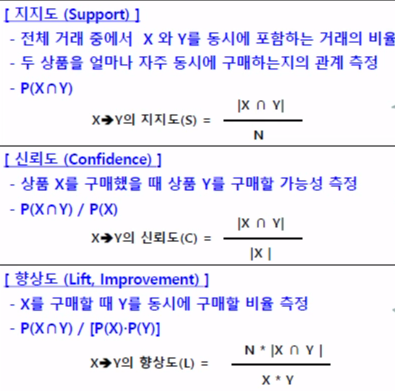

#### apriori 알고리즘
- 최소 지지도 이상의 빈발항목집합을 찾은 후 그것만 연관규칙을 계산
- (장점) 1세대 알고리즘으로 구현과 이해가 쉬움
- (단점) 지지도가 낮은 후보 집합 생성 시 아이템의 개수가 많아지면 계산 복잡도가 증가

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [2]:
df = pd.DataFrame(te_ary,columns = te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [4]:
## 지지도 60 % 이상인 품목만 추출 
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)
2,0.375,(Milk)
3,0.500,(Rice)
4,0.375,"(Apple, Beer)"
5,0.375,"(Milk, Beer)"
6,0.500,"(Rice, Beer)"


In [5]:
## 규칙의 길이를 추출하는 방법 
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets # 장바구니

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Apple, Beer)",2
5,0.375,"(Milk, Beer)",2
6,0.500,"(Rice, Beer)",2


#### 연관규칙분석

In [7]:
import pandas as pd

In [10]:
df= pd.read_csv('/kaggle/input/adp-book-data/groceries.csv',)
df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [11]:
df_split = df.iloc[:,0].str.split(',',expand=True)
df_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [12]:
df_split_ary = df_split.values
groceries = []
for i in range(len(df_split_ary)) : 
    temp = list(filter(None,df_split_ary[i]))
    groceries.append(temp)
    
groceries

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese',

In [13]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
from mlxtend.frequent_patterns import apriori
# 지지도가 5% 이상인 빈번 항목 집합 탐색

groceries_ap = apriori(groceries_tr, min_support=0.03, use_colnames=True)
groceries_ap

,support,itemsets
0,0.033455,(UHT-milk)
1,0.052471,(beef)
2,0.033252,(berries)
3,0.080537,(bottled beer)
4,0.110535,(bottled water)
...,...,...
58,0.048912,"(whole milk, root vegetables)"
59,0.040065,"(whole milk, soda)"
60,0.042302,"(whole milk, tropical fruit)"
61,0.032235,"(whole milk, whipped/sour cream)"


In [29]:
from mlxtend.frequent_patterns import association_rules
# 신뢰도가 0.3 이상인 빈번 항목 집합 탐색
association_rules(groceries_ap, metric="confidence", min_threshold=0.01)
# 서열분석
# 조건 -> 결과

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255542,0.193512,0.074842,0.292877,1.513480,0.025392,1.140520
1,(other vegetables),(whole milk),0.193512,0.255542,0.074842,0.386758,1.513480,0.025392,1.213971
2,(whole milk),(rolls/buns),0.255542,0.183954,0.056640,0.221647,1.204909,0.009632,1.048428
3,(rolls/buns),(whole milk),0.183954,0.255542,0.056640,0.307905,1.204909,0.009632,1.075659
4,(whole milk),(yogurt),0.255542,0.139516,0.056030,0.219260,1.571575,0.020378,1.102139
5,(yogurt),(whole milk),0.139516,0.255542,0.056030,0.401603,1.571575,0.020378,1.244088


In [32]:
rules = association_rules(groceries_ap, metric="lift", min_threshold=1)
# 규칙의 길이 컬럼 생성 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >=1) &
       (rules['confidence'] >=0.1) &
       (rules['lift'] >=1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(bottled water),(whole milk),0.110535,0.255542,0.034371,0.310948,1.216816,0.006124,1.080408,1
1,(whole milk),(bottled water),0.255542,0.110535,0.034371,0.134501,1.216816,0.006124,1.027690,1
2,(whole milk),(citrus fruit),0.255542,0.082672,0.030506,0.119379,1.444004,0.009380,1.041683,1
3,(citrus fruit),(whole milk),0.082672,0.255542,0.030506,0.369004,1.444004,0.009380,1.179814,1
4,(other vegetables),(rolls/buns),0.193512,0.183954,0.042607,0.220179,1.196925,0.007010,1.046453,1
5,(rolls/buns),(other vegetables),0.183954,0.193512,0.042607,0.231620,1.196925,0.007010,1.049594,1
6,(other vegetables),(root vegetables),0.193512,0.109010,0.047387,0.244877,2.246376,0.026292,1.179927,1
7,(root vegetables),(other vegetables),0.109010,0.193512,0.047387,0.434701,2.246376,0.026292,1.426658,1
8,(other vegetables),(tropical fruit),0.193512,0.104942,0.035896,0.185497,1.767610,0.015588,1.098900,1
9,(tropical fruit),(other vegetables),0.104942,0.193512,0.035896,0.342054,1.767610,0.015588,1.225766,1


## FP-Growth

In [ ]:
'''FP-Growth는 데이터 마이닝에서 자주 사용되는 빈발 패턴 마이닝 알고리즘 중 하나로
후보 생성 단계를 거치지 않고, FP-트리를 생성하여 직접 빈발 항목 집합을 생성함.

FP-Growth의 특징은 다음과 같습니다.

Apriori 알고리즘과 비교하여 메모리 사용량이 적습니다.
Apriori 알고리즘과 비교하여 빠른 실행 속도를 보입니다.
FP-트리라는 자료 구조를 사용하여 알고리즘이 수행됩니다.
빈발 항목 집합을 탐색할 때, 후보 생성 과정이 필요하지 않습니다.
FP-Growth의 장단점은 다음과 같습니다.

장점:

메모리 사용량이 적어 대규모 데이터셋에서도 사용이 가능합니다.
Apriori 알고리즘보다 빠른 실행 속도를 보입니다.
후보 생성 과정이 필요하지 않아, Apriori 알고리즘이 가지는 데이터셋 크기에 따른 연산량 증가 문제를 해결할 수 있습니다.
단점:

FP-트리 자료 구조를 만드는 과정이 초기화 비용이 많이 들어갑니다.
마이닝이 진행됨에 따라 FP-트리가 복잡해지는 문제가 있습니다.
FP-트리의 구성 방식 때문에 데이터셋 내에 존재하는 아이템의 개수가 많아질수록 성능이 저하될 수 있습니다.
'''

In [33]:
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# fpgrowth 알고리즘을 사용하여 빈발 항목 집합 탐색
frequent_itemsets = fpgrowth(pd.DataFrame(groceries_tr, columns=te.columns_), min_support=0.01,use_colnames=True)

# 결과 출력
print(frequent_itemsets)

      support                         itemsets
0    0.139516                         (yogurt)
1    0.104942                 (tropical fruit)
2    0.058064                         (coffee)
3    0.255542                     (whole milk)
4    0.075656                      (pip fruit)
..        ...                              ...
328  0.010169  (frozen vegetables, rolls/buns)
329  0.012406      (frozen vegetables, yogurt)
330  0.014236       (other vegetables, onions)
331  0.012101             (whole milk, onions)
332  0.010779      (whole milk, sliced cheese)

[333 rows x 2 columns]


In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# 규칙의 길이 컬럼 생성 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >=1) &
       (rules['confidence'] >=0.1) &
       (rules['lift'] >=1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Milk),(Beer),0.375,0.750,0.375,1.000000,1.333333,0.09375,inf,1
1,(Beer),(Milk),0.750,0.375,0.375,0.500000,1.333333,0.09375,1.25,1
2,(Rice),(Beer),0.500,0.750,0.500,1.000000,1.333333,0.12500,inf,1
3,(Beer),(Rice),0.750,0.500,0.500,0.666667,1.333333,0.12500,1.50,1
